# Анализ данных для дипломной работы

Цель работы - анализ представлений респондентов о целевом состоянии для процесса переговоров. Каким должен быть человек, чтобы переговоры прошли успешно?

Данные собирались с помощью авторской анкеты. Были выделены 5 компонентов состояния человека: физиологический, когнитивный, эмоциональный, поведенческий и рефлексивный. В каждом компоненте были представлены различные качества. Респонденту необходимо было проранжировать качества внутри каждого компонента по убыванию значимости (1 - наиболее важное, 2 - чуть менее важное и так далее). 

Затем подсчитывались средние значения внутри каждого компонента и также ранжировались по степени убывания значимости. Таким образом выделялись наиболее и наименее значимые качества. Для выделения структуры представлений респондентов была проведена иерархическая кластеризация всех качеств. 

**План работы:**
1. Загрузка данных, общий анализ
2. Расчет описательных статистик (среднее и стд.отклон. каждого качества)
3. Построение графиков
4. Иерархическая кластеризация качеств
5. Вывод

## 1. Загрузка данных, общий анализ

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np 
from scipy import stats as st
import numpy as np
import math as mth
import re
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel('diplom.xlsx')

In [138]:
df

,subject,age,gender,kurs,year,Sch_Stud,vid_pod,dolgnost,stag_dolgn,stag_organiz,...,ref_4,ref_dr,beh_1,beh_2,beh_3,beh_4,beh_5,beh_6,beh_dr,age_recode
0,1.0,20.0,1.0,3.0,201718.0,1.0,33.0,NaN,NaN,NaN,...,1.0,NaN,6.0,5.0,4.0,1.0,3.0,2.0,NaN,20
1,2.0,20.0,1.0,3.0,201718.0,1.0,33.0,NaN,NaN,NaN,...,2.0,NaN,6.0,5.0,2.0,1.0,4.0,3.0,NaN,20
2,3.0,20.0,1.0,3.0,201718.0,1.0,33.0,NaN,NaN,NaN,...,1.0,NaN,6.0,5.0,4.0,2.0,1.0,3.0,NaN,20
3,4.0,20.0,1.0,3.0,201718.0,1.0,33.0,NaN,NaN,NaN,...,2.0,NaN,6.0,4.0,5.0,3.0,2.0,1.0,NaN,20
4,5.0,20.0,1.0,3.0,201718.0,1.0,33.0,NaN,NaN,NaN,...,4.0,NaN,5.0,6.0,4.0,2.0,3.0,1.0,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,358.0,33.0,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,2.0,NaN,5.0,6.0,4.0,2.0,3.0,1.0,NaN,33
304,359.0,29.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,1.0,NaN,3.0,6.0,5.0,4.0,2.0,1.0,NaN,29
305,360.0,26.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,1.0,NaN,4.0,3.0,6.0,5.0,2.0,1.0,NaN,26
306,361.0,47.0,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,1.0,NaN,6.0,5.0,4.0,3.0,1.0,2.0,NaN,47


Для удобства дальнейшей обработки создадим списки, куда включим набор качеств по каждому компоненту, а также список со всеми качествами. 

In [3]:
fiz = ['fiz_1', 'fiz_2', 'fiz_3', 'fiz_4', 'fiz_5', 'fiz_6']
cog = ['cog_1', 'cog_2', 'cog_3', 'cog_4', 'cog_5', 'cog_6', 'cog_7', 'cog_8', 'cog_9', 'cog_10', 'cog_11']
em = ['em_1', 'em_2', 'em_3', 'em_4', 'em_5', 'em_6']
ref = ['ref_1', 'ref_2', 'ref_3', 'ref_4']
beh = ['beh_1', 'beh_2', 'beh_3', 'beh_4', 'beh_5', 'beh_6']

all_qualities = ['fiz_1', 'fiz_2', 'fiz_3', 'fiz_4', 'fiz_5', 'fiz_6', 
                 'cog_1', 'cog_2', 'cog_3', 'cog_4', 'cog_5', 'cog_6', 'cog_7', 'cog_8', 'cog_9', 'cog_10', 'cog_11', 
                 'em_1', 'em_2', 'em_3', 'em_4', 'em_5', 'em_6', 
                 'ref_1', 'ref_2', 'ref_3', 'ref_4', 
                 'beh_1', 'beh_2', 'beh_3', 'beh_4', 'beh_5', 'beh_6']

Создадим датасет, где будут только результаты ранжирования качеств. Заполним пропуски нулями, заменим тип данных.

In [4]:
onlyQualities = df.loc[:, all_qualities]
onlyQualities = onlyQualities.fillna(0)

In [5]:
for i in all_qualities:
    onlyQualities[i] = onlyQualities[i].astype('int')

## 2. Расчет описательных статистик

Необходимо получить таблицу, где будут соотнесены средние и стд.отклон для каждого качества. Сначала рассчитаем средние значения.

In [6]:
data = []
columns = []
for i in all_qualities:
    data.append(onlyQualities[i].mean())
    columns.append(i)
    
means = pd.DataFrame([data], columns=columns)
means = means.T
means.reset_index(inplace=True)
means

,index,0
0,fiz_1,2.370130
1,fiz_2,2.814935
2,fiz_3,4.600649
3,fiz_4,3.785714
4,fiz_5,3.211039
5,fiz_6,4.344156
6,cog_1,5.571429
7,cog_2,5.191558
8,cog_3,4.714286
9,cog_4,4.035714


Затем стандартные отклонения.

In [7]:
data1 = []
columns1 = []
for i in all_qualities:
    data1.append(onlyQualities[i].std())
    columns1.append(i)
    
std = pd.DataFrame([data1], columns=columns1)
std = std.T
std.reset_index(inplace=True)
std

,index,0
0,fiz_1,1.548147
1,fiz_2,1.473381
2,fiz_3,1.427829
3,fiz_4,1.490313
4,fiz_5,1.574721
5,fiz_6,1.677131
6,cog_1,3.249369
7,cog_2,3.087064
8,cog_3,3.009679
9,cog_4,2.665137


Соединим таблицы.

In [8]:
descriptives = pd.merge(means, std, on='index', suffixes=('_1', '1'))
descriptives.set_axis(['quality', 'mean_range', 'std_dev'], axis='columns', inplace=True)
descriptives

,quality,mean_range,std_dev
0,fiz_1,2.370130,1.548147
1,fiz_2,2.814935,1.473381
2,fiz_3,4.600649,1.427829
3,fiz_4,3.785714,1.490313
4,fiz_5,3.211039,1.574721
5,fiz_6,4.344156,1.677131
6,cog_1,5.571429,3.249369
7,cog_2,5.191558,3.087064
8,cog_3,4.714286,3.009679
9,cog_4,4.035714,2.665137


Разделим качества по компонентам с помощью регулярных выражений, округлим значения. 

In [9]:
str_pat = r"[a-z]+"

descriptives['group'] = descriptives['quality'].str.extract(r"([a-z]+)", flags=re.I)
descriptives['mean_range'] = descriptives['mean_range'].round(1)
descriptives['std_dev'] = descriptives['std_dev'].round(2)
descriptives

,quality,mean_range,std_dev,group
0,fiz_1,2.4,1.55,fiz
1,fiz_2,2.8,1.47,fiz
2,fiz_3,4.6,1.43,fiz
3,fiz_4,3.8,1.49,fiz
4,fiz_5,3.2,1.57,fiz
5,fiz_6,4.3,1.68,fiz
6,cog_1,5.6,3.25,cog
7,cog_2,5.2,3.09,cog
8,cog_3,4.7,3.01,cog
9,cog_4,4.0,2.67,cog


Проверим, что групп действительно 5. 

In [10]:
groups = descriptives['group'].unique()
groups = groups.tolist()
groups

['fiz', 'cog', 'em', 'ref', 'beh']

Создадим итоговые таблицы, где соединим значение среднего и стд.отклон, поместив стд.отклон в скобки. 

In [16]:
for i in groups:
    element = i
    table = (descriptives.query('group == @element')
                         .sort_values(by='mean_range')
            )
    table = table.assign(desc = table['mean_range'].astype(str)+' '+'('+table['std_dev'].astype(str)+')')
    display(table)  


,quality,mean_range,std_dev,group,desc
0,fiz_1,2.4,1.55,fiz,2.4 (1.55)
1,fiz_2,2.8,1.47,fiz,2.8 (1.47)
4,fiz_5,3.2,1.57,fiz,3.2 (1.57)
3,fiz_4,3.8,1.49,fiz,3.8 (1.49)
5,fiz_6,4.3,1.68,fiz,4.3 (1.68)
2,fiz_3,4.6,1.43,fiz,4.6 (1.43)


,quality,mean_range,std_dev,group,desc
9,cog_4,4.0,2.67,cog,4.0 (2.67)
8,cog_3,4.7,3.01,cog,4.7 (3.01)
7,cog_2,5.2,3.09,cog,5.2 (3.09)
6,cog_1,5.6,3.25,cog,5.6 (3.25)
11,cog_6,5.7,3.23,cog,5.7 (3.23)
12,cog_7,5.9,3.08,cog,5.9 (3.08)
10,cog_5,6.1,3.11,cog,6.1 (3.11)
14,cog_9,6.2,3.31,cog,6.2 (3.31)
13,cog_8,6.6,3.01,cog,6.6 (3.01)
15,cog_10,6.7,3.21,cog,6.7 (3.21)


,quality,mean_range,std_dev,group,desc
18,em_2,2.8,1.57,em,2.8 (1.57)
22,em_6,2.9,1.67,em,2.9 (1.67)
17,em_1,3.6,1.61,em,3.6 (1.61)
20,em_4,3.7,1.65,em,3.7 (1.65)
21,em_5,3.8,1.64,em,3.8 (1.64)
19,em_3,4.1,1.85,em,4.1 (1.85)


,quality,mean_range,std_dev,group,desc
26,ref_4,2.0,1.05,ref,2.0 (1.05)
25,ref_3,2.1,1.02,ref,2.1 (1.02)
23,ref_1,2.6,1.08,ref,2.6 (1.08)
24,ref_2,3.3,0.83,ref,3.3 (0.83)


,quality,mean_range,std_dev,group,desc
30,beh_4,2.3,1.51,beh,2.3 (1.51)
32,beh_6,2.4,1.28,beh,2.4 (1.28)
31,beh_5,2.9,1.39,beh,2.9 (1.39)
29,beh_3,3.7,1.48,beh,3.7 (1.48)
28,beh_2,4.6,1.34,beh,4.6 (1.34)
27,beh_1,5.0,1.21,beh,5.0 (1.21)


## 3. Построение графиков

Построим график, иллюстрирующий разброс средних рангов качеств в каждом компоненте, отметим наиболее важные признаки в каждом компоненте. 

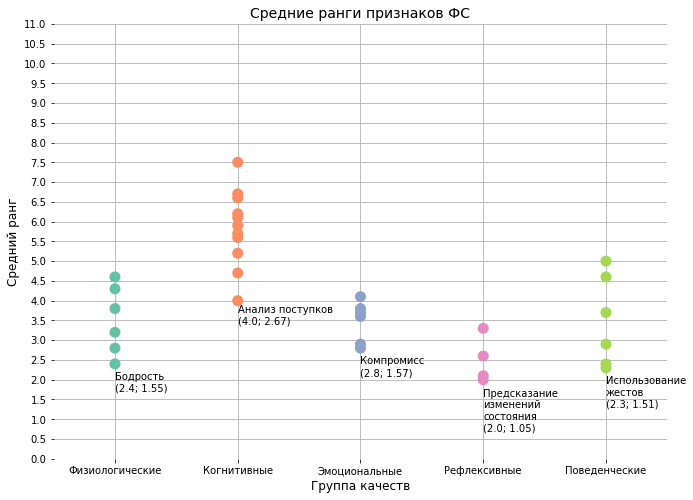

In [13]:
f, ax = plt.subplots(figsize=(11, 8))
sns.color_palette('Set2')
strip = sns.stripplot(x='group', 
              y='mean_range', 
              data=descriptives,
              size=11, 
              palette='Set2', 
              jitter=0)
strip.invert_yaxis()
sns.despine(bottom=True, left=True)
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_xticklabels(['Физиологические', 'Когнитивные', 'Эмоциональные', 'Рефлексивные', 'Поведенческие'])
ax.set_ylim([0,11])
ax.set_title('Средние ранги признаков ФС', fontsize=14)
ax.set_ylabel('Средний ранг', fontsize=12)
ax.set_xlabel('Группа качеств', fontsize=12)
plt.annotate('Бодрость\n(2.4; 1.55)', xy=(1,1), xytext=(0, 1.7))
plt.annotate('Анализ поступков\n(4.0; 2.67)', xy=(2,1.1), xytext=(1, 3.4))
plt.annotate('Компромисс\n(2.8; 1.57)', xy=(2,1.1), xytext=(2, 2.1))
plt.annotate('Предсказание\nизменений\nсостояния\n(2.0; 1.05)', xy=(2,1.1), xytext=(3, 0.7))
plt.annotate('Использование\nжестов\n(2.3; 1.51)', xy=(2,1.1), xytext=(4, 1.3))
plt.show()

Подготовим данные для построения графика с распределением респондентов по возрастам. 

In [14]:
df_years = df.loc[:, ['age', 'Sch_Stud']]
stud_prof_age = df_years.query('Sch_Stud == 1 or Sch_Stud == 3')
stud_prof_age['age'] = stud_prof_age['age'].fillna(0)
stud_prof_age['age'] = stud_prof_age['age'].astype('int')

Построим сам график.

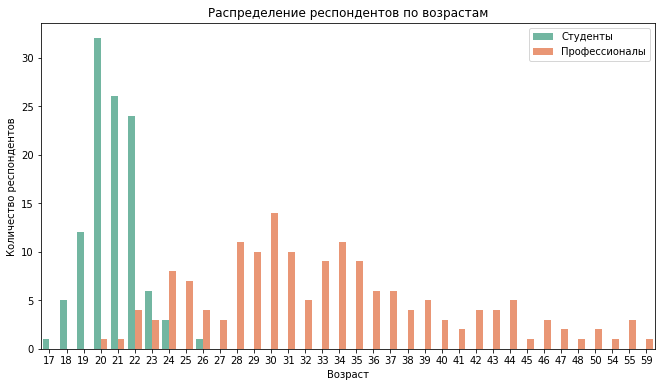

In [15]:
plt.figure(figsize=(11,6))
sns.countplot(data=stud_prof_age.query('age > 0'),x='age',palette='Set2',hue='Sch_Stud')
plt.title('Распределение респондентов по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество респондентов')

plt.legend(labels=['Студенты', 'Профессионалы'],loc='upper right')
plt.show()

## 4. Иерархическая кластеризация качеств

Для определения структуры качеств была проведена иерархическая кластеризация с предварительной стандартизацией данных.

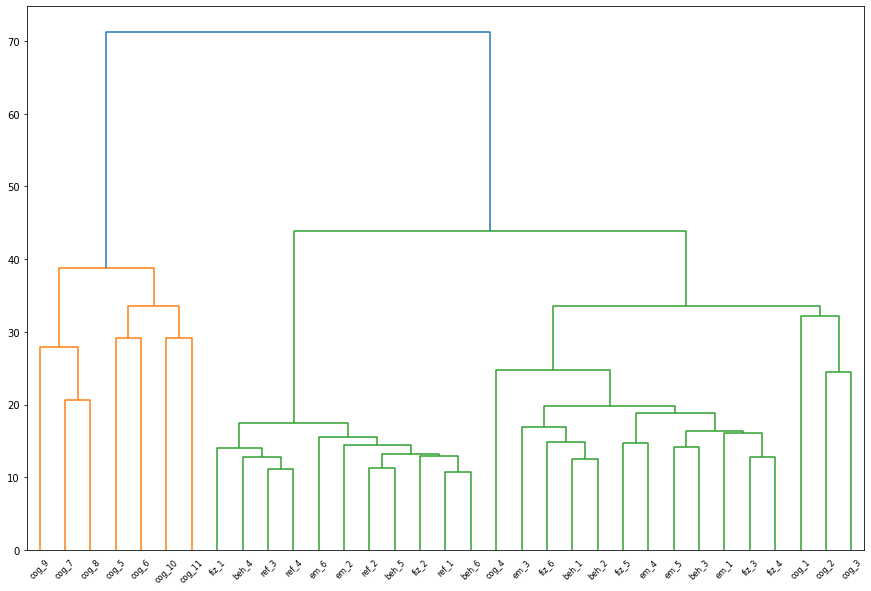

In [29]:
# стандартизация
sc = StandardScaler()
X_sc = sc.fit_transform(onlyQualities.T)
# агломеративная кластеризация
linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', labels = all_qualities)
plt.show()

## 5. Вывод

В полной версии дипломной работы проводилось сравнение результатов иерархической кластеризации представлений студентов и профессионалов. Было получено, что студенты и профессионалы по-разному видят структуру оптимального состояния. 

В ходе анализа данных были подсчитаны описательные статистики, был построен график-визуализация результатов, а также проведена иерархическая кластеризация по всей выборке респондентов. 

В результате иерархической кластеризации было выделено 4 кластера. Наиболее интересным результатом кластеризации представляется разнесение качеств когнитивного блока на две группы: качества 1, 2 и 3 стоят отдельно. Необходима дальнейшая содержательная интерпретация. 